<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS646/blob/main/Find_Planck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pylab as plt
from scipy.stats import linregress
from scipy import optimize
from google.colab import files
%pylab inline
#plt.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
dv = .0005
di = .005
v435 = [-1.174, -1.171, -1.168, -1.165, -1.162, -1.159, -1.156]
i435 = [-.133, -.075, .001, .065, .129, .199, .273]
v435err = [dv for x in range(len(v435))]
i435err = [di for x in range(len(i435))]

In [4]:
A = np.vander(v435, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA = np.dot(A.T, A / np.power(i435err,2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors
w = np.linalg.solve(ATA, np.dot(A.T, i435 / np.power(i435err,2)))

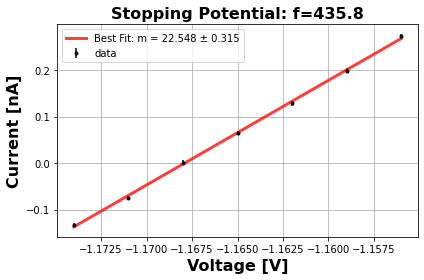

In [10]:
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(v435,i435,yerr=i435err, fmt=".k", label="data")
ax.plot(v435, np.multiply(w[0],v435)+w[1], "r", 
         alpha=0.75, lw=3, label="Best Fit: m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
ax.set_title(r'Stopping Potential: f=435.8', fontsize=16, fontweight='bold')
ax.set_xlabel('Voltage [V]', fontsize=16, fontweight='bold')
ax.set_ylabel(r'Current [nA]', fontsize=16, fontweight='bold')
#ax.set_xlim(.9,2.9)
#ax.set_ylim(3,10)
ax.legend()
ax.grid()
plt.tight_layout()